In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
from scipy.optimize import curve_fit
from scipy.stats import linregress 
from uncertainties import ufloat,unumpy
from decimal import *
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
%matplotlib inline

In [33]:
df = pd.read_csv('dados.csv')

In [34]:
df

,V(V),I(ma),Fundo Escala:Tensão (V),Fundo Escala:Corrente (mA)
0,5.0310,9.0500,20.0,20.0
1,4.8810,8.7800,20.0,20.0
2,4.3140,7.7600,20.0,20.0
3,3.7940,6.8200,20.0,20.0
4,3.2690,5.8700,20.0,20.0
5,2.7770,4.9900,20.0,20.0
6,2.1920,3.9300,20.0,20.0
7,1.6205,2.9100,2.0,20.0
8,0.8786,1.5900,2.0,2.0
9,0.4134,0.7450,2.0,2.0


In [35]:
# Incerteza tensao
df20 = df[df['Fundo Escala:Tensão (V)'] == 20]
df2 = df[df['Fundo Escala:Tensão (V)'] == 2]
df02 = df[df['Fundo Escala:Tensão (V)'] == 0.2]


# Incerteza corrente
dfi20 = df[df['Fundo Escala:Corrente (mA)'] == 20]
dfi2 = df[df['Fundo Escala:Corrente (mA)'] == 2]
dfi02 = df[df['Fundo Escala:Corrente (mA)'] == 0.2]

In [36]:
# Incerteza para o potencial
df20['dV(V)'] = np.round(abs(df20['V(V)'] * (0.05/100)) + 3* 10**(-3),3)
df2['dV(V)'] = np.round(abs(df2['V(V)'] * (0.05/100)) + 3* 10**(-4),4)
df02['dV(V)'] = np.round(abs(df02['V(V)'] * (0.05/100)) + 3* 10**(-4),4)
# df20['dV(V)'] = abs(df20['V(V)'] * (0.05/100)) # + 3* 10**(-5)
df20.head(10)

,V(V),I(ma),Fundo Escala:Tensão (V),Fundo Escala:Corrente (mA),dV(V)
0,5.031,9.05,20.0,20.0,0.006
1,4.881,8.78,20.0,20.0,0.005
2,4.314,7.76,20.0,20.0,0.005
3,3.794,6.82,20.0,20.0,0.005
4,3.269,5.87,20.0,20.0,0.005
5,2.777,4.99,20.0,20.0,0.004
6,2.192,3.93,20.0,20.0,0.004
20,-2.357,-4.22,20.0,20.0,0.004
21,-2.849,-5.11,20.0,20.0,0.004
22,-3.241,-5.82,20.0,20.0,0.005


In [37]:
# Incerteza para a corrente
dfi20['dI(mA)'] = np.round(abs(dfi20['I(ma)'] * (1.8/100)) + 2* 10**(-2),2)
dfi20 = dfi20['dI(mA)']
dfi2['dI(mA)'] = np.round(abs(dfi2['I(ma)'] * (1.8/100)) + 2* 10**(-3),3)
dfi2 = dfi2['dI(mA)']
dfi02['dI(mA)'] = np.round(abs(dfi02['I(ma)'] * (1.8/100)) + 2* 10**(-4),4)
dfi02 = dfi02['dI(mA)']




# dfi02['dI(mA)'] = abs(dfi02['I(ma)'] * (1.8/100)) # + 2 * 10**(-3)
# dfi02.head()

In [38]:
dfi20.head()

0    0.18
1    0.18
2    0.16
3    0.14
4    0.13
Name: dI(mA), dtype: float64

In [39]:
dfi2.head()

8     0.031
9     0.015
10    0.015
16    0.010
17    0.028
Name: dI(mA), dtype: float64

In [40]:
dfi02.head()

11    0.0024
12    0.0029
13    0.0012
14    0.0008
15    0.0035
Name: dI(mA), dtype: float64

In [41]:
df_new = pd.concat([df20,df2,df02])
df_new2 = pd.concat([dfi20,dfi2,dfi02])
df_new3 = pd.concat([df_new,df_new2],axis=1)
# df_new = 0

In [42]:
df_new3.head(30)

,V(V),I(ma),Fundo Escala:Tensão (V),Fundo Escala:Corrente (mA),dV(V),dI(mA)
0,5.0310,9.0500,20.0,20.0,0.0060,0.1800
1,4.8810,8.7800,20.0,20.0,0.0050,0.1800
2,4.3140,7.7600,20.0,20.0,0.0050,0.1600
3,3.7940,6.8200,20.0,20.0,0.0050,0.1400
4,3.2690,5.8700,20.0,20.0,0.0050,0.1300
5,2.7770,4.9900,20.0,20.0,0.0040,0.1100
6,2.1920,3.9300,20.0,20.0,0.0040,0.0900
7,1.6205,2.9100,2.0,20.0,0.0011,0.0700
8,0.8786,1.5900,2.0,2.0,0.0007,0.0310
9,0.4134,0.7450,2.0,2.0,0.0005,0.0150


In [43]:
sigma_x = np.asarray(df_new3['dI(mA)'])
sigma_y = np.asarray(df_new3['dV(V)'])

In [44]:
df_new3['V(V)'].max()

5.031

<ErrorbarContainer object of 3 artists>

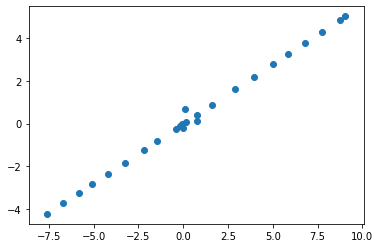

In [45]:
#plt.figure(figsize=(10,10))
plt.errorbar(df_new3['I(ma)'], df_new3['V(V)'],yerr=df_new3['dV(V)'], xerr=df_new3['dI(mA)'], fmt='o')
# plt.scatter(df_new3['V(V)'], df['I(ma)'])


In [46]:
def func(x,m,b):
    return m*x + b

In [47]:
alpha, pcov =  curve_fit(func,df['I(ma)'], df['V(V)'], p0=[-2,10])

In [48]:
V_fit = func(df['I(ma)'], *alpha)

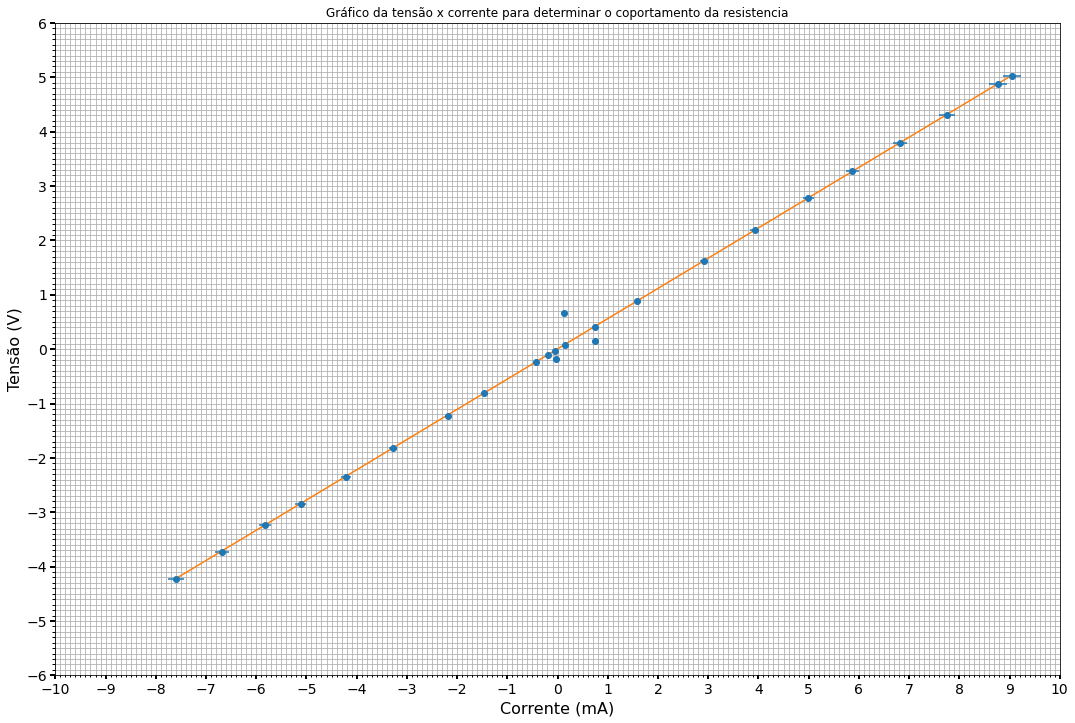

In [90]:
#ax=plt.axes()
fig, ax = plt.subplots(figsize=(18,12))
#plt.figure(figsize=(18,12))# , dpi=1200)
plt.errorbar(df_new3['I(ma)'], df_new3['V(V)'], yerr=df_new3['dV(V)'], xerr=df_new3['dI(mA)'], fmt='o')
plt.plot(df['I(ma)'], V_fit)

plt.xlabel('Corrente (mA)',fontsize=16)
plt.ylabel('Tensão (V)', fontsize=16)

#Título:
plt.title('Gráfico da tensão x corrente para determinar o coportamento da resistencia')

# Escala
#ax=plt.axes()

# Eixo Y 
plt.yticks(fontsize=14)
plt.ylim(-6,6)
ax.yaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.1))
plt.tick_params(axis='y', which='minor', length=3,width='1')
plt.tick_params(axis='y', which='major', length=5,width='2')

# Eixo X
plt.xticks(fontsize=14)
plt.xlim([-10,10])
ax.xaxis.set_minor_locator(plt.MultipleLocator(0.1))
ax.xaxis.set_major_locator(plt.MultipleLocator(1))
plt.tick_params(axis='x', which='minor', length=2,width='1')
plt.tick_params(axis='x', which='major', length=4,width='2')
# plt.savefig('VxI', dpi='figure')
# plt.savefig('VxI.svg', dpi=1200)

plt.grid(which='both')
plt.savefig('VxI.pdf', dpi=1200)

plt.show()


In [50]:
# Incerteza
media_pond = 0 
for i in range(len(df_new3['V(V)'])):
    media_pond = media_pond + df_new3['V(V)'][i] * df_new3['dV(V)'][i]
    media_pond = media_pond/df_new3['V(V)'].sum()

print('Incerteza da reta = ', np.round(media_pond,3))




Incerteza da reta =  -0.003


In [20]:
print(np.round(alpha[0],3))

0.556


In [21]:
print('Resistência  Calculada = 556 +/- 3 Ohm')
print('Resistência Nomilal = 560 +/- 28 Ohm')
print('560+28 > 560 +/- 3 > 560-28 ')

Resistência  Calculada = 556 +/- 3 Ohm
Resistência Nomilal = 560 +/- 28 Ohm
560+28 > 560 +/- 3 > 560-28 


In [22]:
df['V(V)'].max()
# df['V(V)'].min()

5.031

In [23]:
df['I(ma)'].min()

-7.6

In [24]:
df_new3.to_csv('dados-final.csv')